In [84]:
#David Rumford
#CS 4410
#Homework 7 - Chapter 16

In [85]:
#import the Fashion-MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

In [86]:
#load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [87]:
#explore the dimensions of the training set images
X_train.shape

(60000, 28, 28)

In [88]:
y_train.shape

(60000,)

In [89]:
X_test.shape

(10000, 28, 28)

In [90]:
y_test.shape

(10000,)

In [91]:
#visualize some of the dataset images
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)

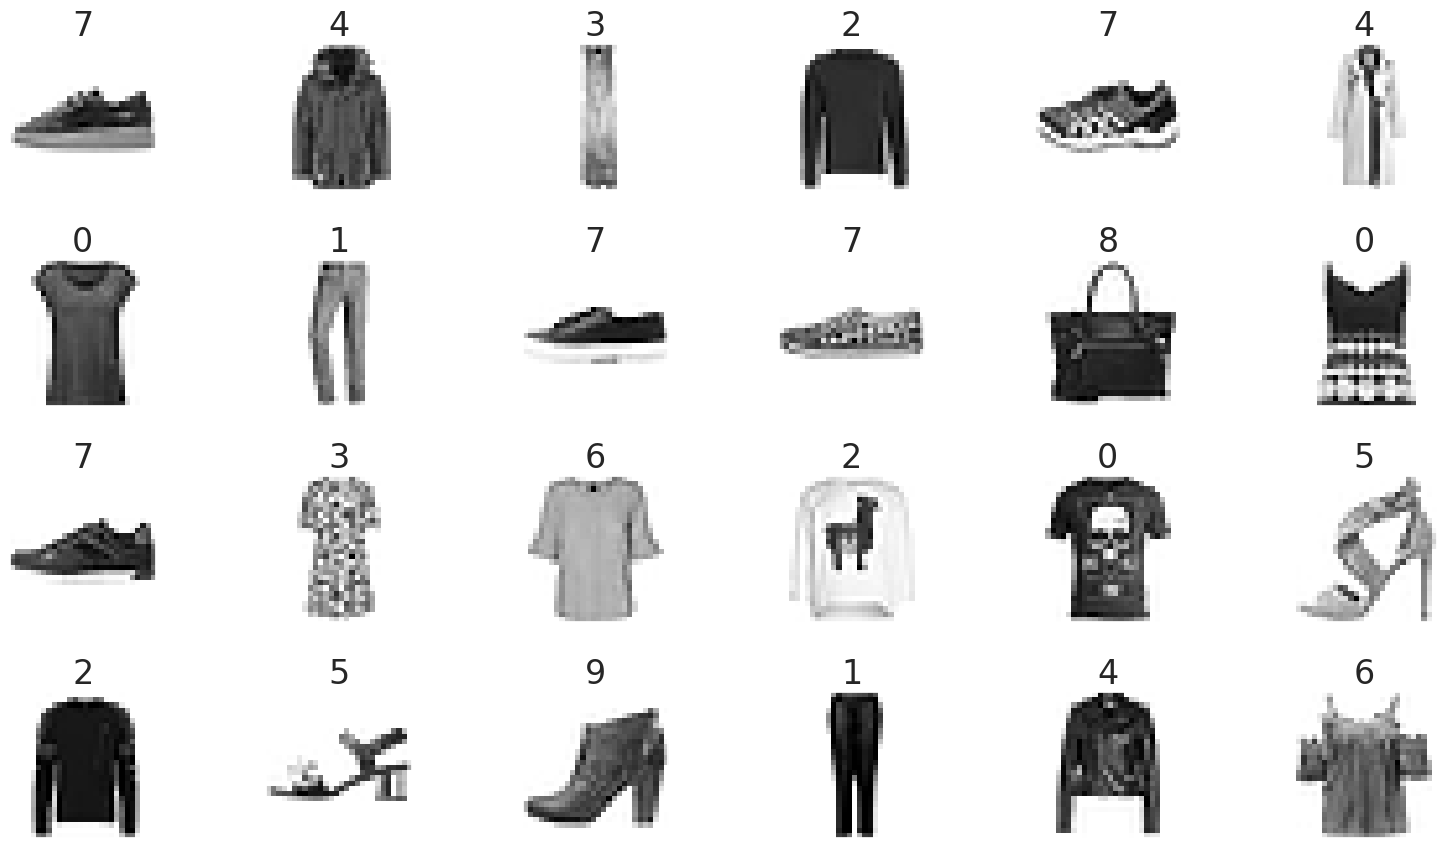

In [92]:
#show images from Fashion-MNIST
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

In [93]:
#reshape the image data - X_train
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [94]:
#reshape the image data - X_test
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [95]:
#normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [96]:
#One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [97]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [98]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [99]:
#create the neural network
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [100]:
#add layers to the network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [101]:
#add a convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

In [102]:
#add a MaxPooling2D layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [103]:
#adding aadditional convolution and pooling layers
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [104]:
#flatten the results
cnn.add(Flatten())

In [129]:
#16.4 - add another Dense layer with 4096 neurons
cnn.add(Dense(units=4096, activation='relu'))

In [130]:
#add dense layer to reduce number of features
cnn.add(Dense(units=128, activation='relu'))

In [131]:
#add another dense layer to produce final output
cnn.add(Dense(units=10, activation='softmax'))

In [132]:
#print the model's summary
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
#visualize the model's structure
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [134]:
#compile the model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [135]:
#observe training and validation accuracy
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
        validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 125s 147ms/step - loss: 0.2395 - accuracy: 0.9262 - val_loss: 0.2618 - val_accuracy: 0.9158
Epoch 2/5
844/844 [==============================] - 120s 143ms/step - loss: 0.1782 - accuracy: 0.9375 - val_loss: 0.2732 - val_accuracy: 0.9102
Epoch 3/5
844/844 [==============================] - 122s 144ms/step - loss: 0.1567 - accuracy: 0.9445 - val_loss: 0.2580 - val_accuracy: 0.9118
Epoch 4/5
844/844 [==============================] - 121s 143ms/step - loss: 0.1422 - accuracy: 0.9495 - val_loss: 0.2753 - val_accuracy: 0.9085
Epoch 5/5
844/844 [==============================] - 119s 141ms/step - loss: 0.1223 - accuracy: 0.9571 - val_loss: 0.2709 - val_accuracy: 0.9188


In [136]:
#evaluating the model
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 24ms/step - loss: 0.2953 - accuracy: 0.9122


In [114]:
#make predictions
predictions = cnn.predict(X_test)
y_test[0]

313/313 [==============================] - 8s 25ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [115]:
#check probabilities for first test sample
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000024544%
1: 0.0000006522%
2: 0.0000558251%
3: 0.0000135245%
4: 0.0000004969%
5: 0.0052129672%
6: 0.0000009965%
7: 0.0197973772%
8: 0.0000887549%
9: 99.9748349190%


In [116]:
#locate the incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))
len(incorrect_predictions)

931

In [ ]:
#visualize incorrect predictions
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [125]:
#display probabilities for incorrect predictions
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
display_probabilities(predictions[23])

0: 0.0000000510%
1: 0.0000000009%
2: 0.0000001890%
3: 0.0000000011%
4: 0.0000000002%
5: 99.9999821186%
6: 0.0000000074%
7: 0.0000025001%
8: 0.0000017910%
9: 0.0000068997%


In [126]:
display_probabilities(predictions[89])

0: 9.3549735844%
1: 0.0001943721%
2: 49.9535620213%
3: 0.0114439521%
4: 0.1496487414%
5: 0.0002527170%
6: 40.5290842056%
7: 0.0000022816%
8: 0.0007788494%
9: 0.0000505642%


In [127]:
display_probabilities(predictions[244])

0: 0.0053747921%
1: 0.0000113839%
2: 90.9956276417%
3: 0.0008098502%
4: 8.0203324556%
5: 0.0000000269%
6: 0.9778440930%
7: 0.0000000004%
8: 0.0000019766%
9: 0.0000003199%


In [128]:
#save the model
cnn.save('fashion-mnist_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#The model does not perform as well with the Fashion-MNIST
#dataset. Loss is significantly higher, while accuracy is lower
#The model was also slower by ~2s with the Fashion-MNIST dataset.
#With the added Dense layer with 4096 neurons, the speed is lower
#while the accuracy is higher.